In [1]:
import matplotlib.pyplot as plt
import sys
import os
import time
%matplotlib notebook 

class UsbTmcDriver:
    """Simple implementation of a USBTMC device driver, in the style of visa.h"""
 
    def __init__(self, device):
        self.device = device
        self.FILE = os.open(device, os.O_RDWR)
 
        # TODO: Test that the file opened
 
    def write(self, command):
        os.write(self.FILE, command);
 
    def read(self, length = 400):
        return os.read(self.FILE, length)
 
    def getName(self):
        self.write("*IDN?")
        return self.read(300)
 
    def sendReset(self):
        self.write("*RST")

def getDeviceList():
    dirList=os.listdir("/dev")
    result=list()

    for fname in dirList:
        if(fname.startswith("usbtmc")):
            result.append("/dev/" + fname)

    return result


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<IPython.core.display.Javascript object>


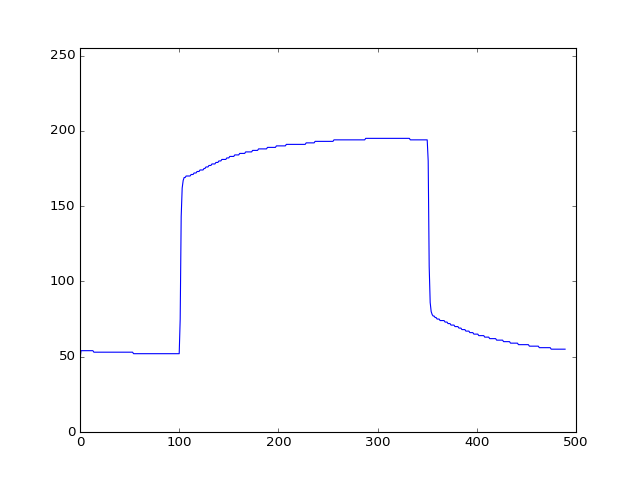

KeyboardInterrupt: 

In [9]:
fig,ax = plt.subplots(1,1)

# looking for oscilloscope
devices =  getDeviceList()
# initiate oscilloscope
osc = UsbTmcDriver(devices[0])

#while True:
# waiting for SINGLE trigger
for n in range(1000):
    osc.write(':SINGLE')
    osc.write(':TRIG:STAT?')
    while (osc.read(4) != 'STOP'):
        osc.write(':TRIG:STAT?')

    #osc.write(':STOP')
    osc.write(':WAV:SOUR CHAN1')
    osc.write(':WAV:MODE NORM')
    osc.write(':WAV:FORM BYTE')
    osc.write(':WAV:DATA?')

    #wave = map(float, osc.read(100).split(','))
    wave = bytearray(osc.read(1400))

    fig.clf()
    plt.ylim(0, 255)
    plt.plot(wave[10:])
    fig.canvas.draw()
    time.sleep(0.1)
